In [183]:
# import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [184]:
winedata = pd.read_csv('winequality-red.csv')
winedata.shape

(1599, 12)

In [185]:
winedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


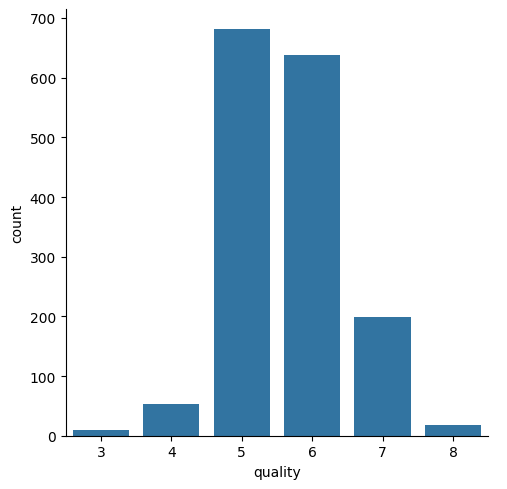

In [186]:
sns.catplot(x='quality', data=winedata, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

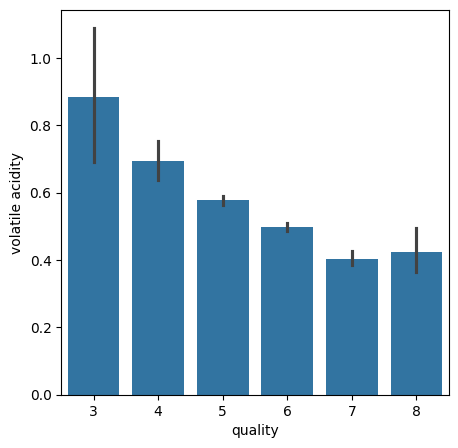

In [187]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=winedata)

<Axes: xlabel='quality', ylabel='citric acid'>

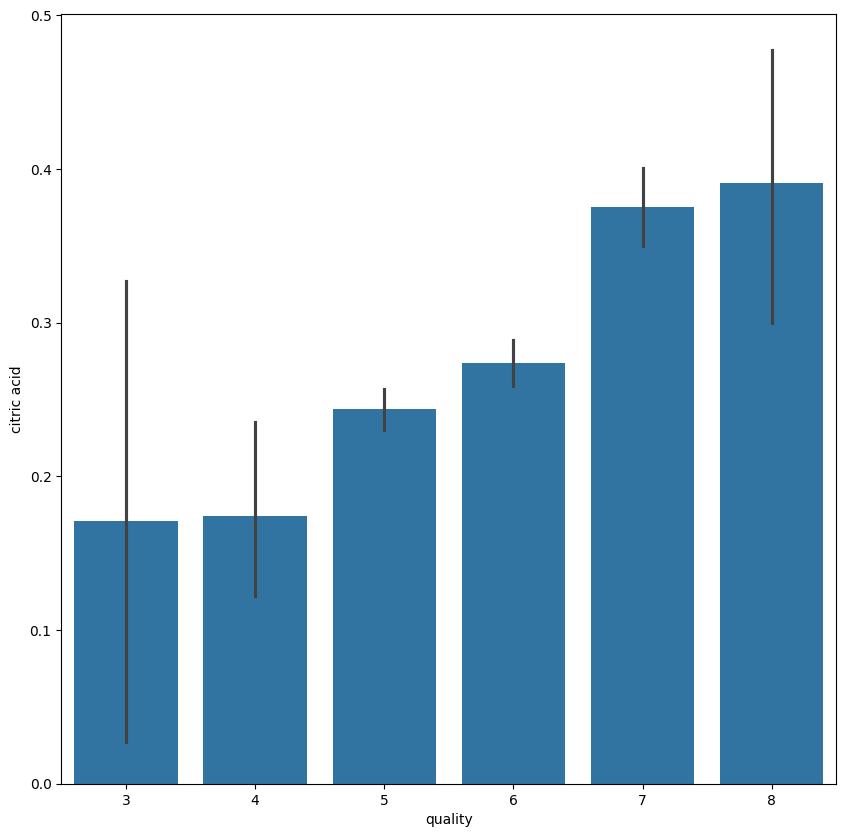

In [170]:
plot = plt.figure(figsize=(10, 10))
sns.barplot(x='quality', y='citric acid', data=winedata)

In [171]:
correlation = winedata.corr()

<Axes: >

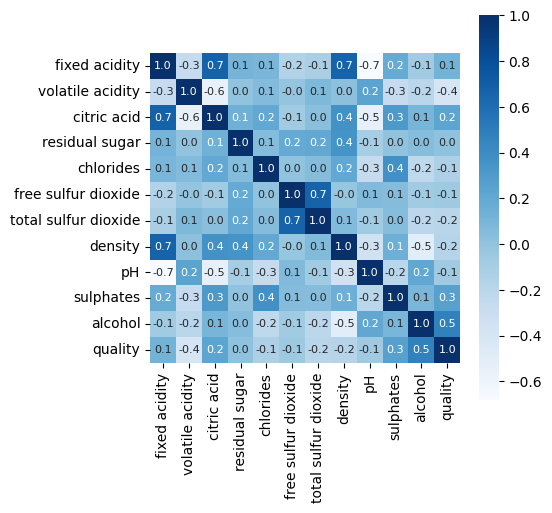

In [172]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap ='Blues')

In [173]:
winedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [174]:
winedata.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [175]:
X =  winedata.drop('quality', axis=1)
Y = winedata['quality'].apply(lambda y_val: 1 if y_val>=7 else 0 )

In [176]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [177]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Train and test

In [178]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=3)
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1119,) (480,)


In [179]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [180]:
xtrp = model.predict(X_train)
TrDa = accuracy_score(xtrp, Y_train)
print('Accuracy: ',TrDa)

Accuracy:  1.0


In [181]:
XTP = model.predict(X_test)
tda = accuracy_score(XTP, Y_test)
print("Accuracy: ",tda)

Accuracy:  0.9208333333333333


In [182]:
# idata = (9.6,0.32,0.47,1.4,0.055999999999999994,9.0,24.0,0.99695,3.22,0.82,10.3)
idata = (11.5,0.3,0.6,2.0,0.067,12.0,27.0,0.9981,3.11,0.97,10.1)
idaNA = np.asarray(idata)

idR = idaNA.reshape(1,-1)

prediction = model.predict(idR)

print(prediction)

[0]


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
